In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter('ignore')

In [87]:
data = pd.read_csv("housing.csv")

In [88]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [90]:
data.dropna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [92]:
# Step 1: Data Exploration and Cleaning
# Check for missing values
print(data.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [93]:
df = data.copy()

In [94]:
# independent features
X = df.drop(['price'], axis=1)
y = df['price']

In [95]:
num_cols = X.dtypes[X.dtypes != 'object'].index.tolist()
obj_cols = X.dtypes[df.dtypes == 'object'].index.tolist()

In [96]:
def find_r_c(cols):

    size = len(cols)

    c = 3
    if len(cols)%c == 0:
        r = int(len(cols)/c)
    else:
        r = int(len(cols)/c)+1
        
    return r,c

In [97]:
# Custom function for univariate visualization of Numerical Variables -

def UVA_numerical(data, num_cols, graph_type): # check for continuity 

    '''
    Univariate_Analysis_numerical
    takes a group of variables (numerical) and plots distributions.
    '''
    r,c = find_r_c(num_cols)
    
    plt.rcParams["figure.figsize"] = [20, 5*r]
    plt.rcParams["figure.autolayout"] = True

    count = 1
#     plt.tight_layout()
    for i in range(len(num_cols)):
        plt.subplot(r,c,count)
        plt.subplots_adjust(hspace = 1)
        
        if graph_type == 'dist':       
            sns.histplot(df[num_cols[i]], kde = True)
        elif graph_type == 'box':
            sns.boxplot(df[num_cols[i]])

        count += 1

In [98]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_continuous(data, cont_cols):
    '''
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''

    r,c = find_r_c(cont_cols)
        
    plt.rcParams["figure.figsize"] = [22, 6*r]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['axes.titlesize'] = 16

    count = 1
        
    #looping for each variable
    for i in cont_cols:
        
        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)

        # calculating points of standard deviation
        points = [mean-st_dev, mean+st_dev]

        #Plotting the variable with every information
        plt.subplot(r,c,count)
        plt.subplots_adjust(hspace = 10)
        
        s = 100
        sns.histplot(x = i, kde = True, data = data)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev", lw=3)
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max", s = s)
        sns.scatterplot([mean], [0], color = 'red', label = "mean", s = s)
        sns.scatterplot([median], [0], color = 'blue', label = "median", s = s)
        sns.scatterplot([q1], [0], color = 'green', label = "Q1", s = s)
        sns.scatterplot([q3], [0], color = 'green', label = "Q3", s = s)

        plt.xlabel('{}'.format(i), fontsize = 22)
        plt.ylabel('density')
        
        t = 'std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}; \nQ1 = {}, Q3 = {}'
        plt.title(t.format((round(points[0],2),round(points[1],2)),round(kurt,2),round(skew,2),
                           (round(mini,2),round(maxi,2),round(ran,2)),round(mean,2),round(median,2), 
                           round(q1,2),round(q3,2)))
        count += 1

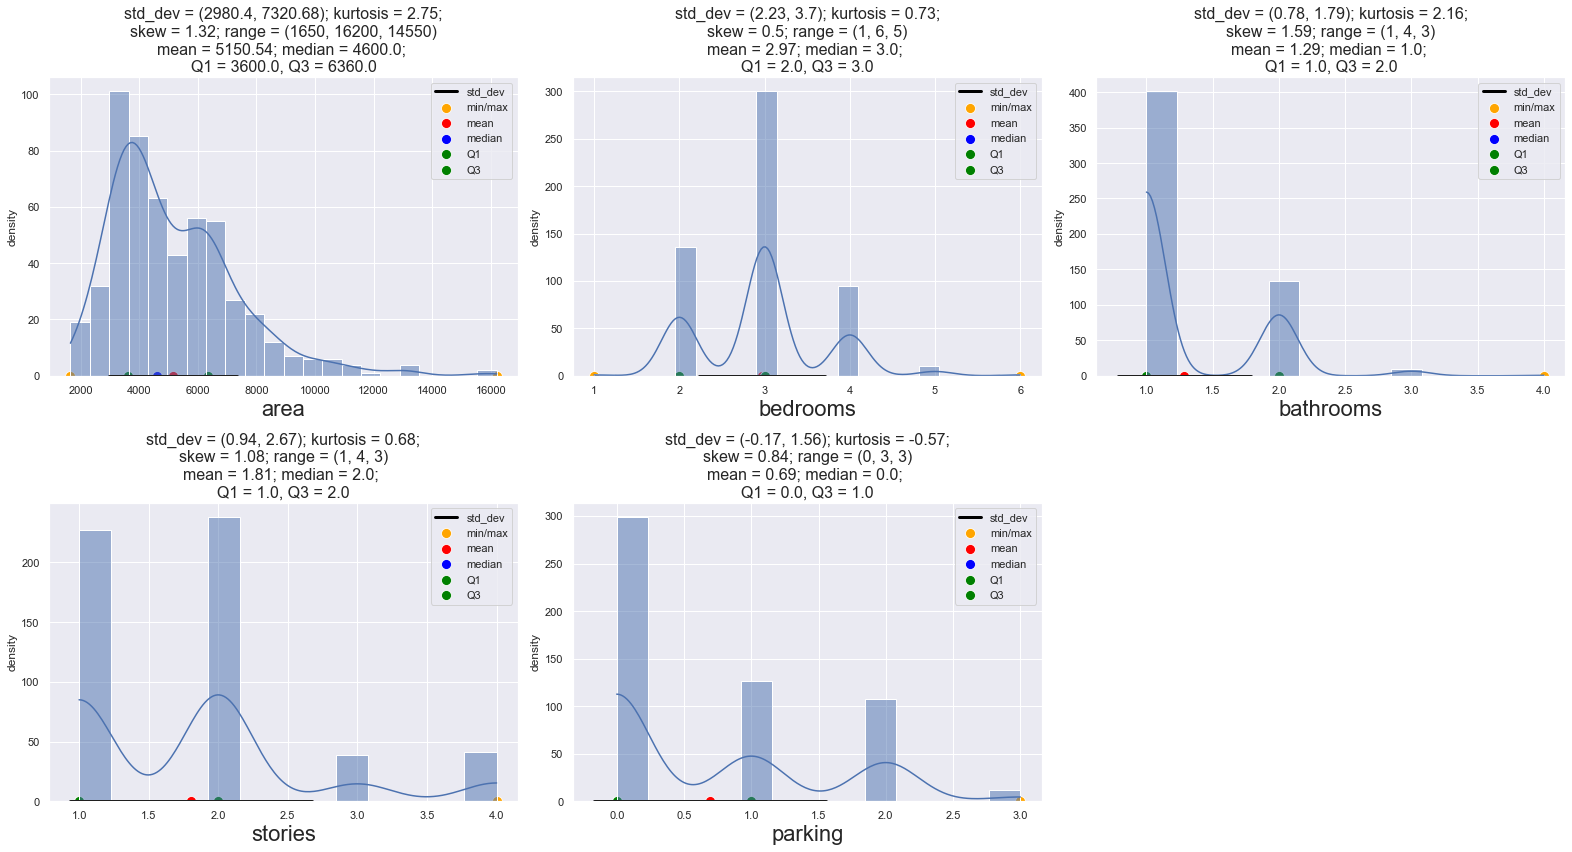

In [99]:
UVA_continuous(data, num_cols)

In [100]:
cont_cols = ['area']

disc_cols = [i for i in num_cols if i not in cont_cols]

cat_cols = obj_cols + disc_cols

In [101]:
print(cont_cols)
print(cat_cols)

['area']
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [102]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_continuous(data, cont_cols):
    '''
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''

    r,c = find_r_c(cont_cols)
        
    plt.rcParams["figure.figsize"] = [22, 6*r]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['axes.titlesize'] = 16

    count = 1
        
    #looping for each variable
    for i in cont_cols:
        
        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)

        # calculating points of standard deviation
        points = [mean-st_dev, mean+st_dev]

        #Plotting the variable with every information
        plt.subplot(r,c,count)
        plt.subplots_adjust(hspace = 10)
        
        s = 100
        sns.histplot(x = i, kde = True, data = data)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev", lw=3)
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max", s = s)
        sns.scatterplot([mean], [0], color = 'red', label = "mean", s = s)
        sns.scatterplot([median], [0], color = 'blue', label = "median", s = s)
        sns.scatterplot([q1], [0], color = 'green', label = "Q1", s = s)
        sns.scatterplot([q3], [0], color = 'green', label = "Q3", s = s)

        plt.xlabel('{}'.format(i), fontsize = 22)
        plt.ylabel('density')
        
        t = 'std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}; \nQ1 = {}, Q3 = {}'
        plt.title(t.format((round(points[0],2),round(points[1],2)),round(kurt,2),round(skew,2),
                           (round(mini,2),round(maxi,2),round(ran,2)),round(mean,2),round(median,2), 
                           round(q1,2),round(q3,2)))
        count += 1

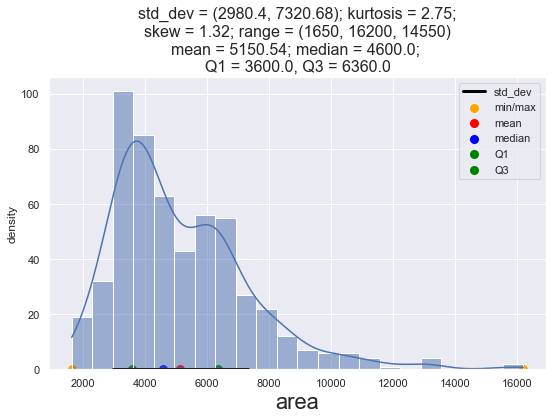

In [103]:
UVA_continuous(df, cont_cols)

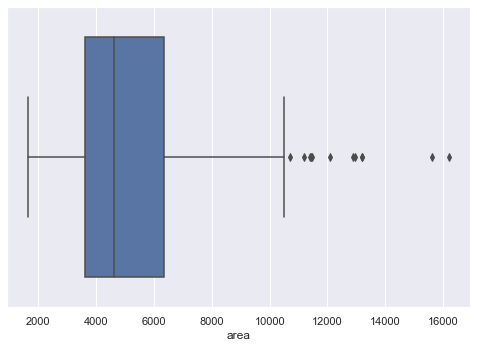

In [104]:
UVA_numerical(df, cont_cols, 'box')

In [105]:
# Custom function for univariate visualization of Categorical Variables

def UVA_category(data, cat_cols): #cat_cols = obj_cols + disc_cols # for today we will tackle obj_cols 

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    r,c = find_r_c(cat_cols)
    
    if len(cat_cols) < 2:
        plt.rcParams["figure.figsize"] = (5, 5)  

        i = cat_cols[0]

        norm_count = data[i].value_counts(normalize = True)
        s = str(norm_count).split('names')[0]
        n_uni = data[i].nunique()
        sns.countplot(data[i])
        plt.xlabel('{}'.format(i), fontsize = 10)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,s), size = 14)
        
    else:
        plt.rcParams["figure.figsize"] = (20, 5*r)    

        count = 1
        for i in cat_cols:
            norm_count = data[i].value_counts(normalize = True)
            s = str(norm_count).split('names')[0]
            n_uni = data[i].nunique()

            plt.subplot(r,c,count)
            plt.subplots_adjust(hspace = 0.5)
            sns.countplot(data[i])
            plt.xlabel('{}'.format(i), fontsize = 10)
            plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,s), size = 14)

            count += 1

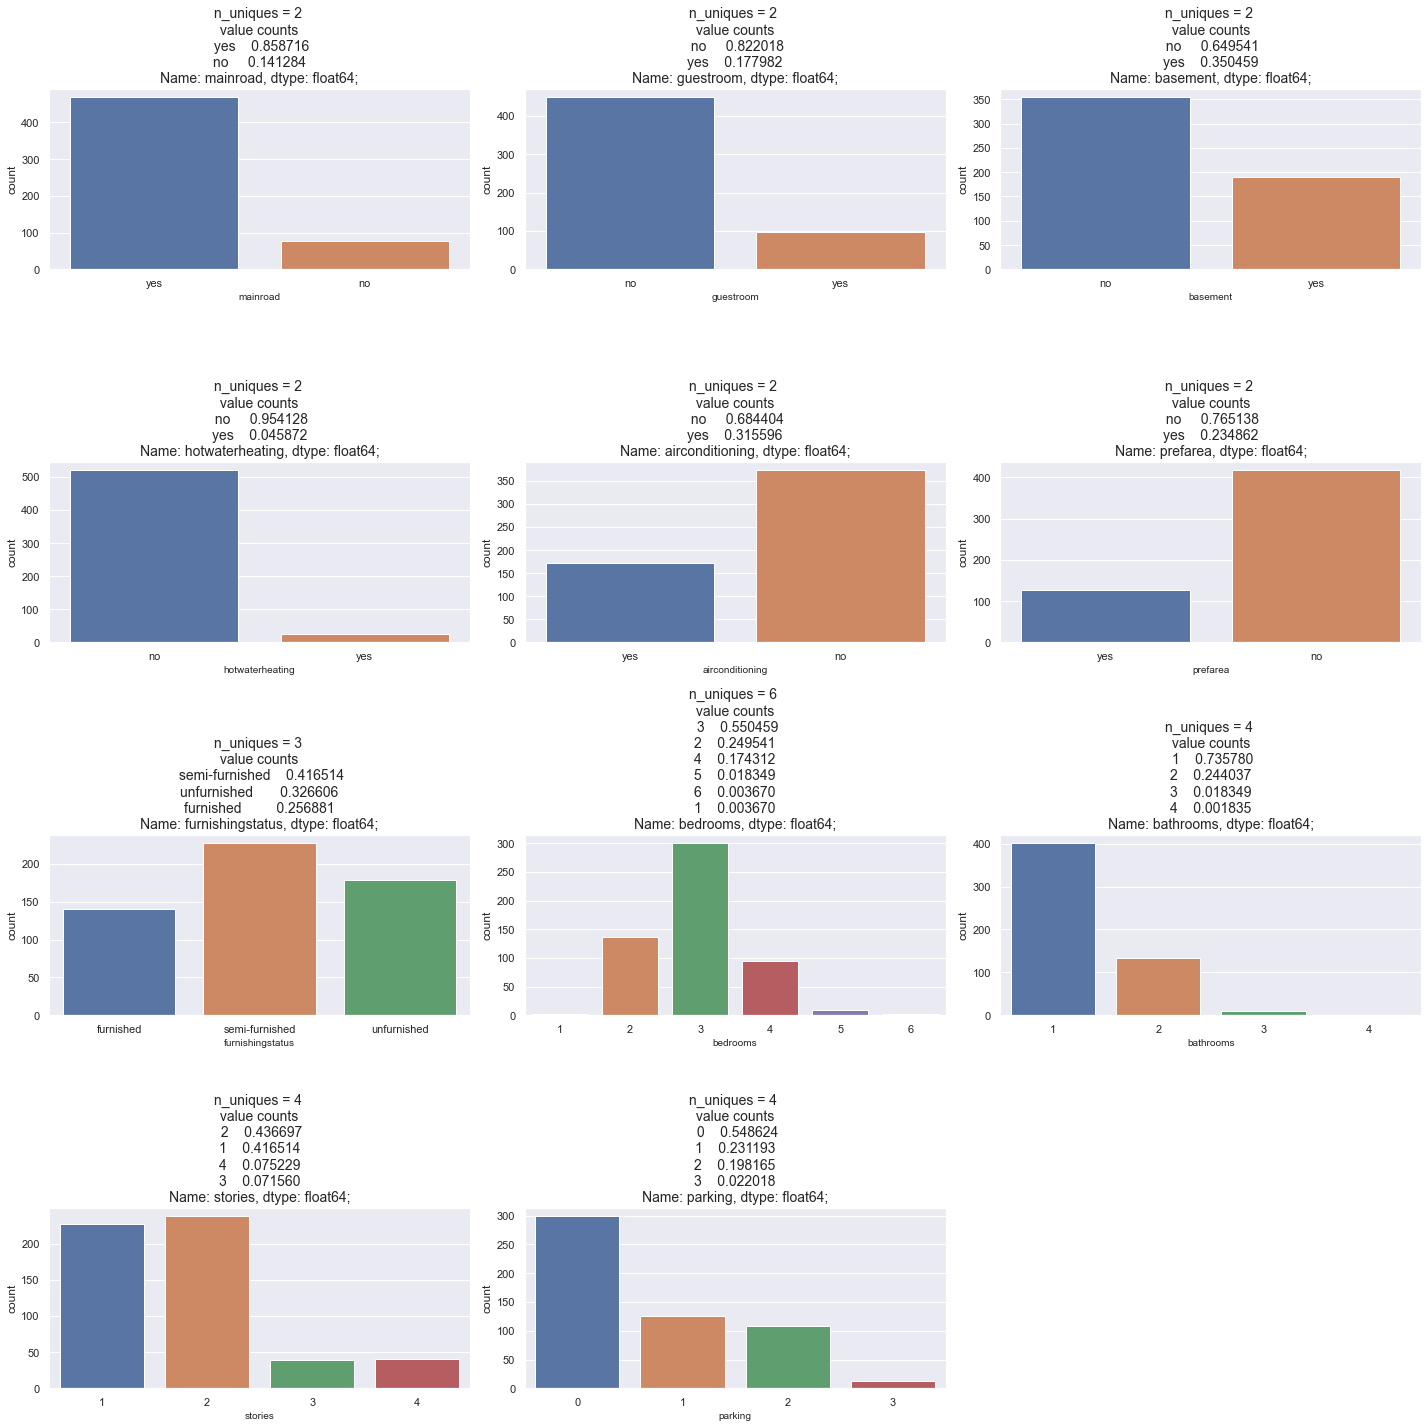

In [106]:
UVA_category(df, cat_cols)

In [107]:
def BVA_categorical_plot_simple(data, tar, cat_cols): # -- use this when X is cat and y is also cat
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    r,c = find_r_c(cat_cols)

    plt.rcParams["figure.figsize"] = (20, 5*r)    
    plt.subplots_adjust(hspace = 2)

    count = 1
    
    for i in cat_cols:
        
        plt.subplot(r,c,count)
        sns.countplot(x=i, hue=tar, data=data)
        f_obs = pd.crosstab(data[tar],data[i]).values
        chi, p, dof, expected = stats.chi2_contingency(f_obs)

        if p<0.05:
            sig = True
        else:
            sig = False
            
        s = pd.crosstab(df[i], df[tar],normalize='index').fillna(0).round(2) 
        
        plt.title("{} \n p-value = {}\n difference significant? = {}\n".format(s,round(p,4),sig))
        plt.xlabel(i)

        count += 1

In [108]:
def plot_barplot_cont_cols(df, cont_cols, target): ## use this when X is cont and y is cat
    
    r,c = find_r_c(cont_cols)

    plt.rcParams["figure.figsize"] = [5*c, 4*r]

    count = 1
    for i in range(len(cont_cols)):
        plt.subplot(r,c,count)
        sns.barplot(x=target, y=cont_cols[i], data = df) # estimator = np.median  #np.sum
        plt.xlabel('')
        count+=1

In [109]:
def plot_distplot_bva(df, cont_cols, target, htest): ## use this when X is cont and y is cat
    
    r,c = find_r_c(cont_cols)

    plt.rcParams["figure.figsize"] = [5*c, 4*r]

    count = 1
    for i in cont_cols:
        plt.subplot(r,c,count)
        
        samples = []
        for j in df[target].unique():
            df_sample = df.loc[df[target] == j, i]
            values_ = df_sample.values
            samples.append(values_)
            
        sns.kdeplot(x = i, hue = target, data = df) 
        
        if htest == 'anova':
            f, p = stats.f_oneway(samples[0], samples[1])
        elif htest == 'ttest':
            f, p = stats.ttest_ind(samples[0], samples[1])
            
        if p < 0.05:
            d = 'Difference is significant'
        else:
            d = 'Difference is NOT significant'
            
        plt.title('p-value = {}, statistic ={} \n {}'.format(round(p,4), round(f,2), d), size = 12)
        plt.xlabel(i, size = 14)
    
        count+=1

In [110]:
def plot_barplot_cat_cols(df, cat_cols, target): ## use this when X is cat and y is cont
    
    r,c = find_r_c(cat_cols)

    plt.rcParams["figure.figsize"] = [5*c, 4*r]

    count = 1
    for i in range(len(cont_cols)):
        plt.subplot(r,c,count)
        sns.barplot(x=cat_cols[i], y=tar, data = df) # estimator = np.median  #np.sum
        plt.xlabel('')
        count+=1

In [111]:
def plot_distplot_bva_cont(df, cat_cols, target, htest= 'anova', h = 5): ## use this when X is cat and y is cont
    
    r,c = find_r_c(cat_cols)

    plt.rcParams["figure.figsize"] = [10*c, h*r]

    count = 1
    for i in cat_cols:
        plt.subplot(r,c,count)
        
        samples = []
        for j in df[i].unique():
            df_sample = df.loc[df[i] == j, target]
            values_ = df_sample.values
            
            if len(values_) > 1:
                sns.distplot(values_, hist = False) #, rug=True)
                samples.append(values_)
            
#         sns.kdeplot(x = target, hue = i, data = df) 
        
        if htest == 'anova':
            f, p = stats.f_oneway(samples[0], samples[1])
        elif htest == 'ttest':
            f, p = stats.ttest_ind(samples[0], samples[1])
            
        if p < 0.05:
            d = 'Difference is significant'
        else:
            d = 'Difference is NOT significant'
            
        plt.title('p-value = {}, statistic ={} \n {}'.format(round(p,4), round(f,2), d), size = 20)
        plt.xlabel(i, size = 20)
    
        count+=1

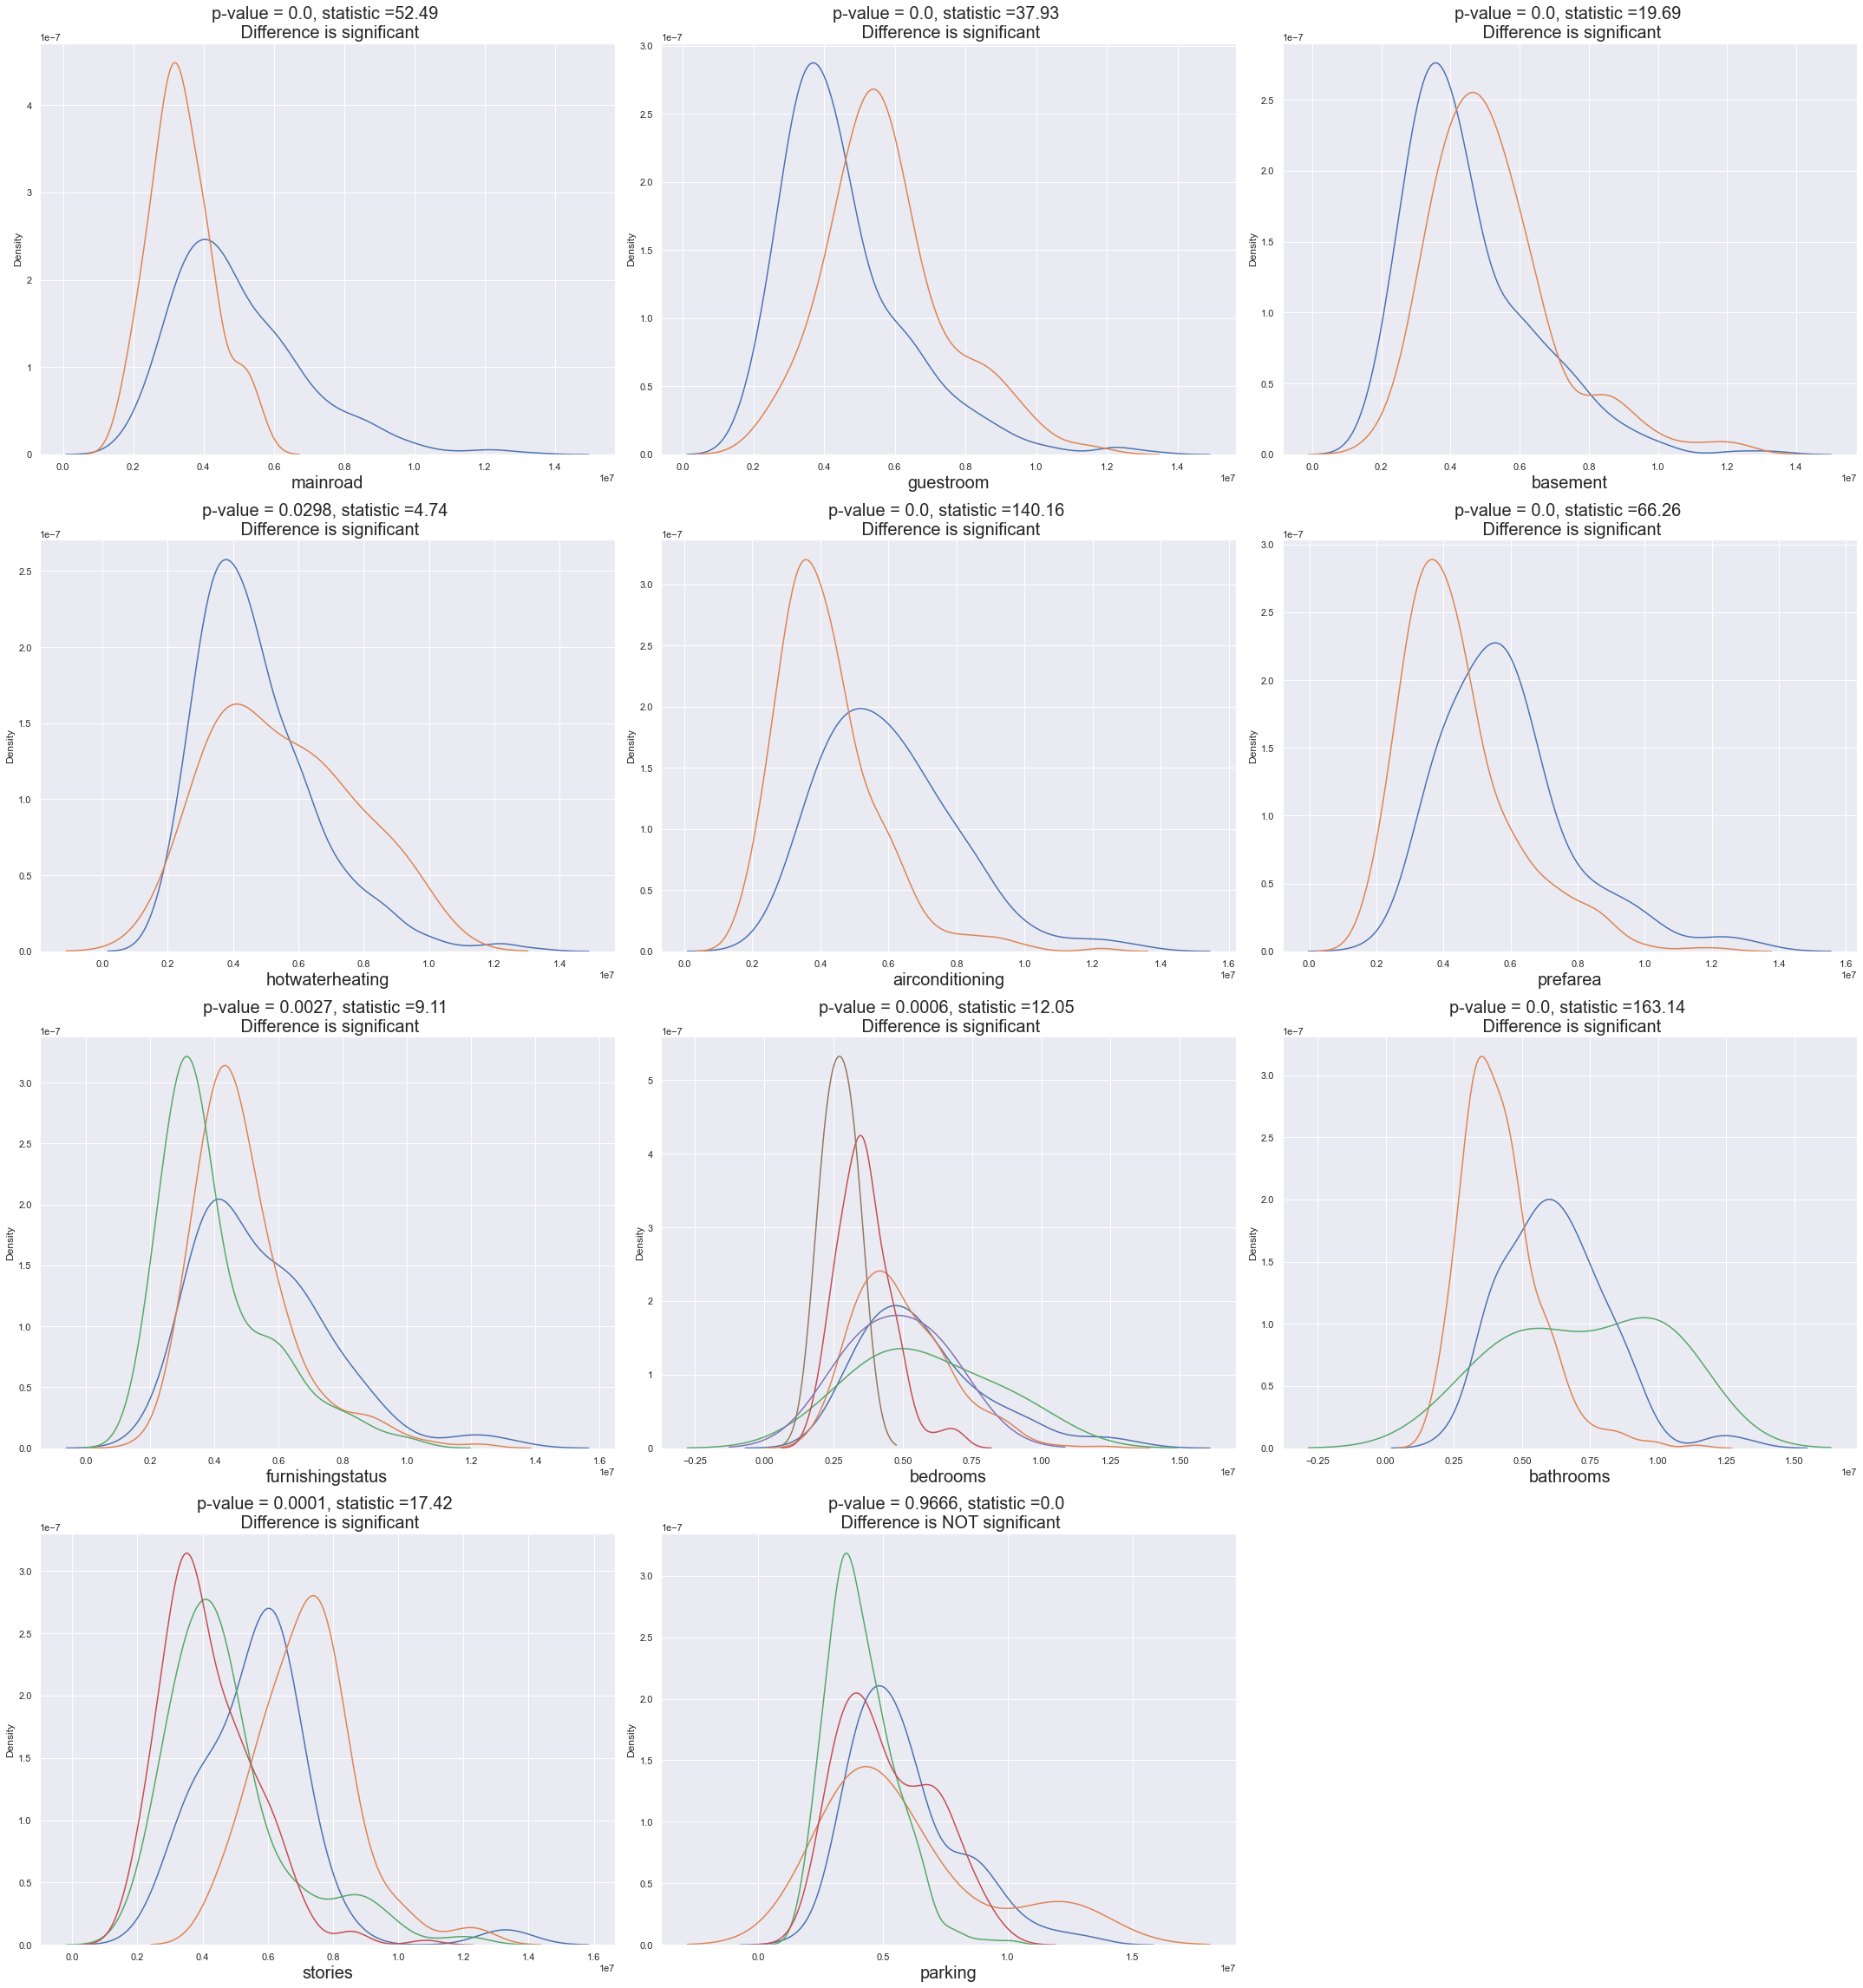

In [112]:
plot_distplot_bva_cont(df, cat_cols, 'price','anova', h = 8)

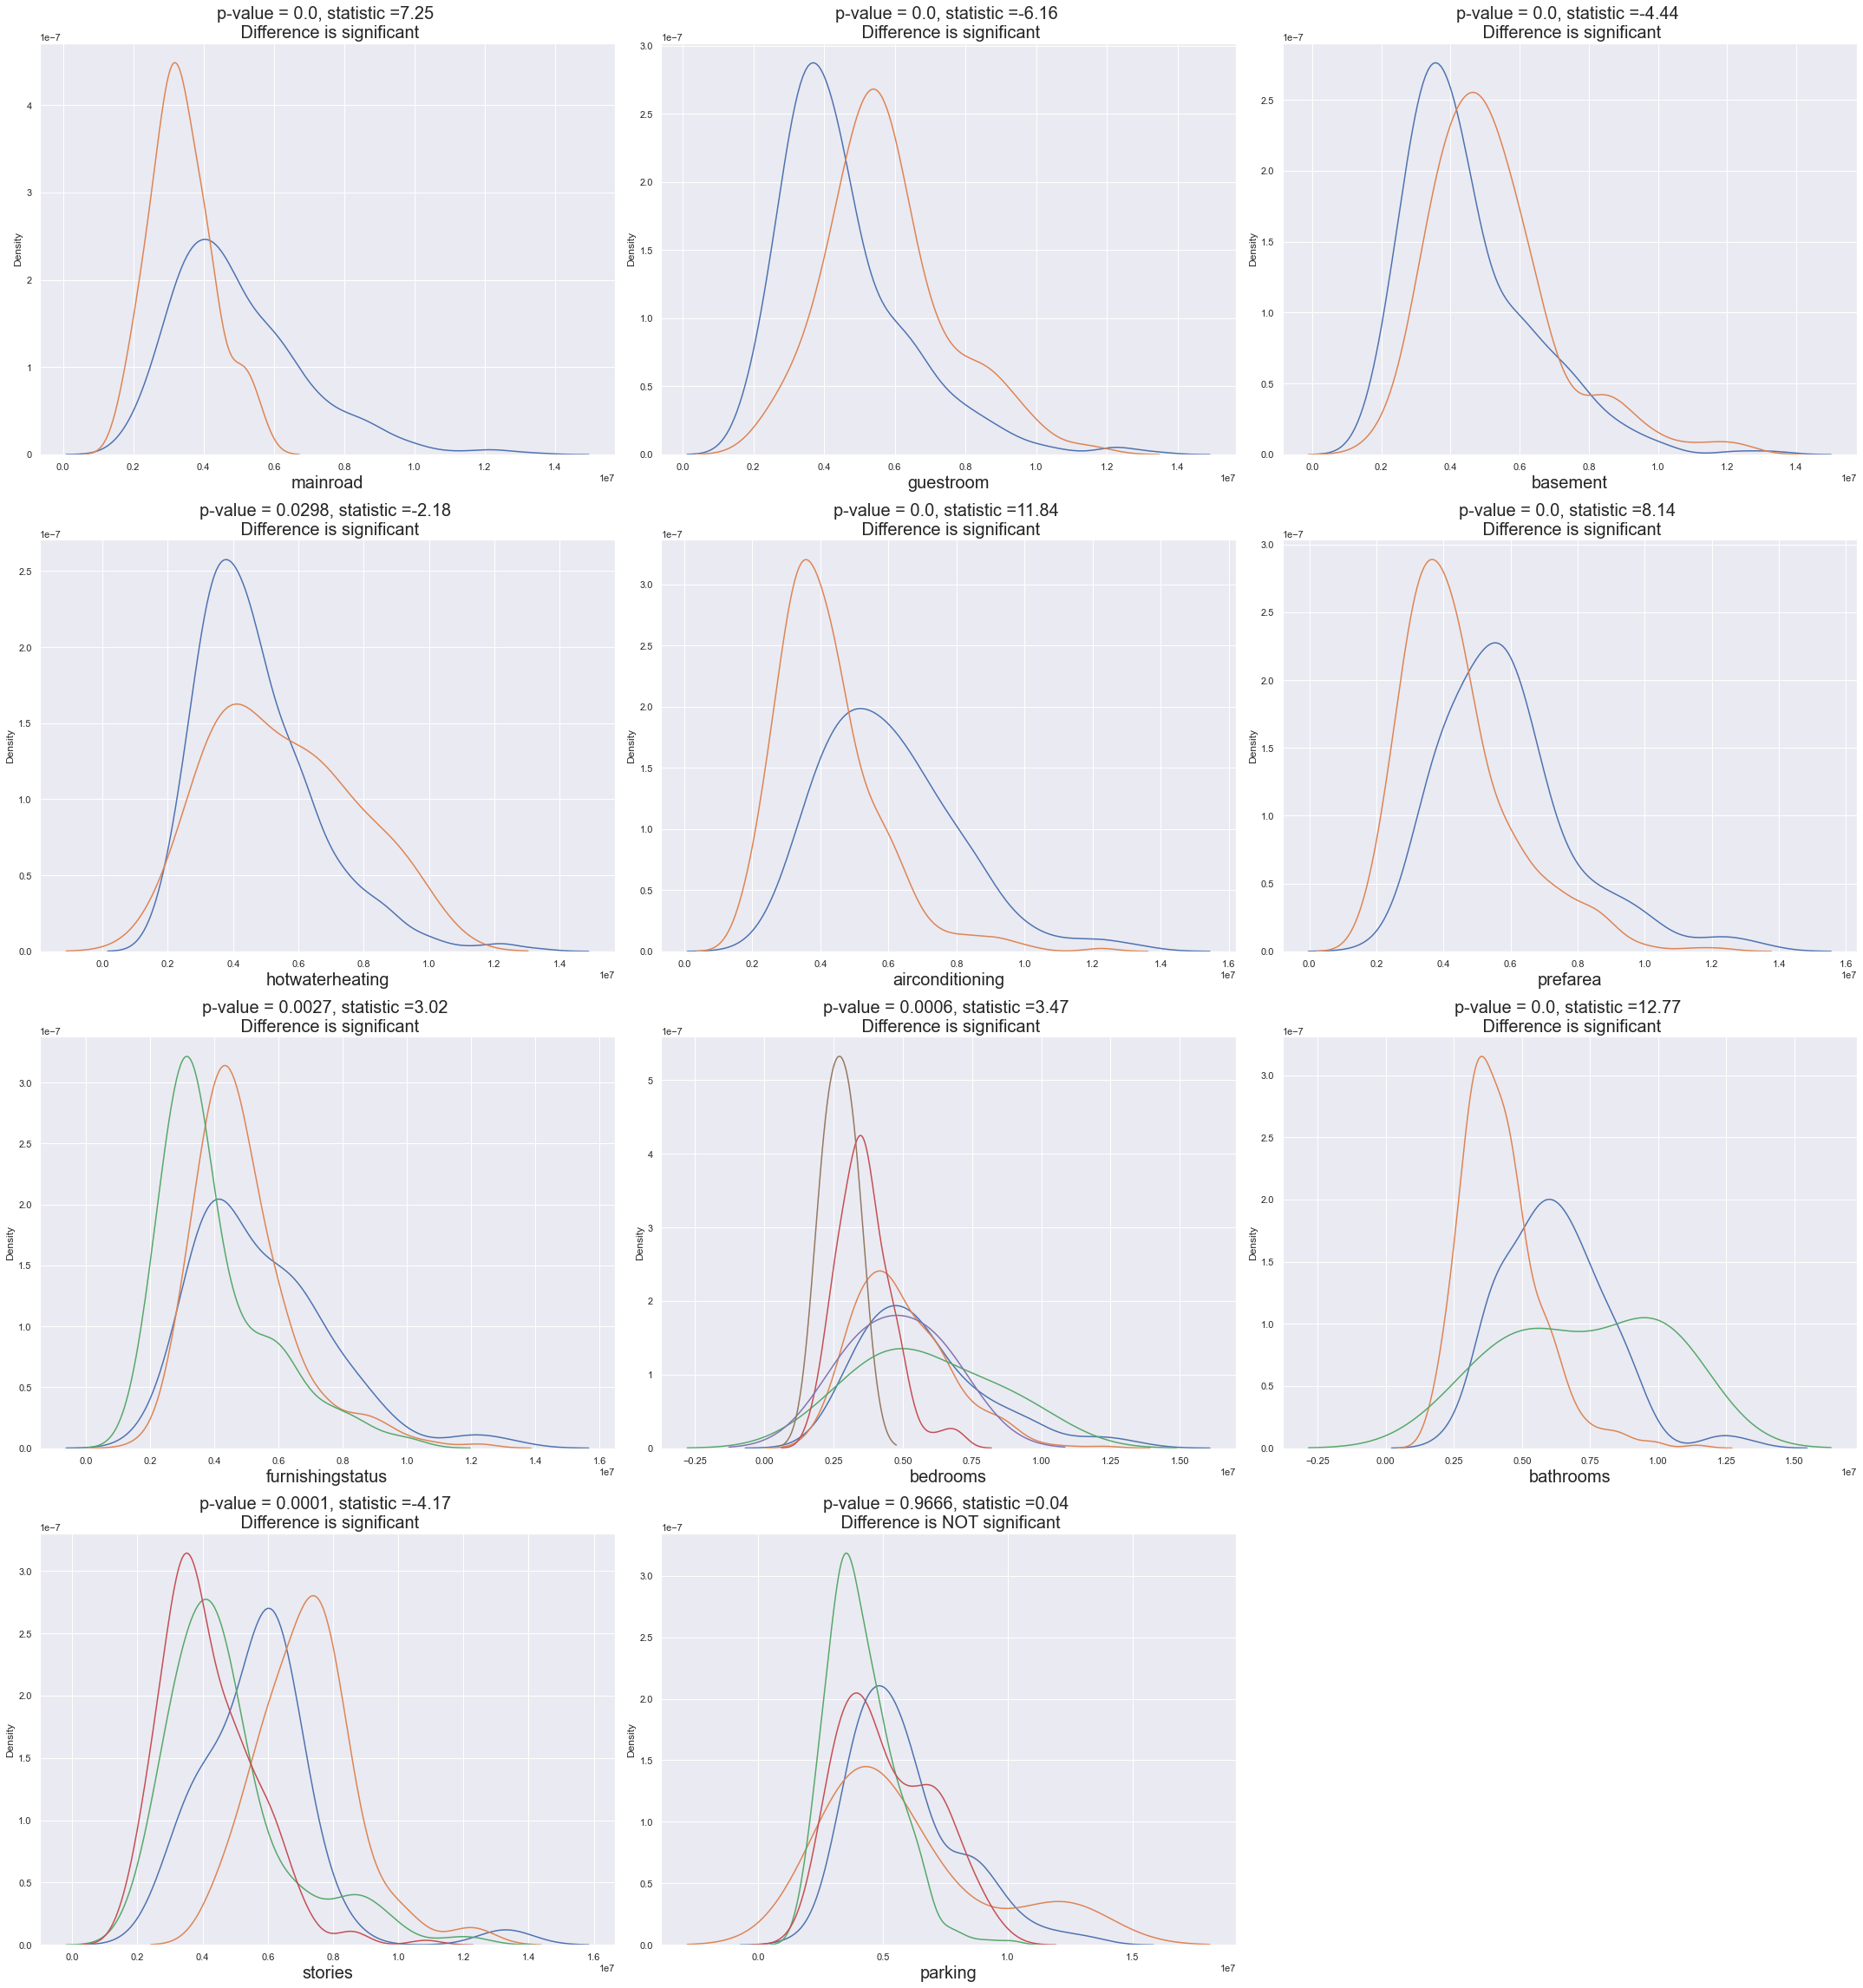

In [113]:
plot_distplot_bva_cont(df, cat_cols, 'price','ttest', h = 8)

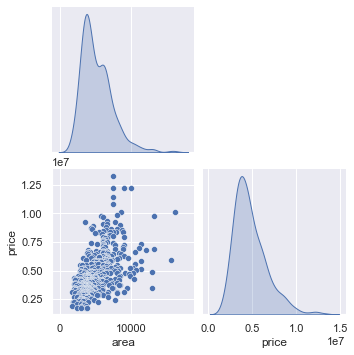

In [114]:
sns.pairplot(df[cont_cols + ['price']], diag_kind= 'kde', corner = True) ## cont-cont relation
plt.show()

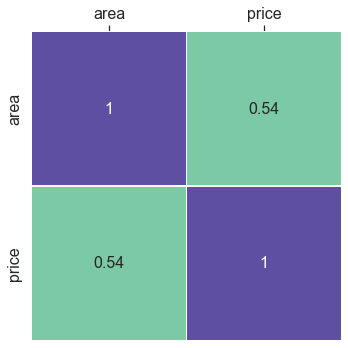

In [115]:
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(df[cont_cols + ['price']].corr(),
            annot=True, annot_kws={"size":16},
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")

ax.xaxis.tick_top()

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
    
plt.show()

In [116]:
import statsmodels.api as sm

Xc = sm.add_constant(X) #

In [117]:
# creating dummy variables for OLS
Xc = pd.get_dummies(
    Xc,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [118]:
xc_train, xc_test, y_train, y_test = train_test_split(Xc, y, test_size=0.3, random_state=1)

In [119]:
olsmodel = sm.OLS(y_train, xc_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.33
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.02e-82
Time:                        23:16:34   Log-Likelihood:                -5810.6
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     367   BIC:                         1.170e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [120]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [121]:
# checking model performance on train set (seen 70% data) ---> OLS
print("Training Performance for OLS\n")
olsmodel_train_perf = model_performance_regression(olsmodel, xc_train, y_train)
olsmodel_train_perf

Training Performance for OLS



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.016728e+06,742532.225692,0.681237,0.669044,16.196534


In [122]:
# checking model performance on test set (seen 30% data) --> OLS
print("Test Performance for OLS\n")
olsmodel_test_perf = model_performance_regression(olsmodel, xc_test, y_test)
olsmodel_test_perf

Test Performance for OLS



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.168376e+06,852334.006549,0.66463,0.633119,19.766707


In [ ]:
## treat multicolliearity- VIF

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    
    return vif

In [124]:
checking_vif(xc_train)

,feature,VIF
0,const,31.465194
1,area,1.329312
2,bedrooms,1.401891
3,bathrooms,1.323172
4,stories,1.473254
5,parking,1.211745
6,mainroad_yes,1.180006
7,guestroom_yes,1.234792
8,basement_yes,1.386191
9,hotwaterheating_yes,1.046005


In [127]:
## All VIF factors are below 4

In [126]:
# def treating_multicollinearity(predictors, target, high_vif_columns):
#     """
#     Checking the effect of dropping the columns showing high multicollinearity
#     on model performance (adj. R-squared and RMSE)

#     predictors: independent variables
#     target: dependent variable
#     high_vif_columns: columns having high VIF
#     """
#     # empty lists to store adj. R-squared and RMSE values
#     adj_r2 = []
#     rmse = []

#     # build ols models by dropping one of the high VIF columns at a time
#     # store the adjusted R-squared and RMSE in the lists defined previously
#     for col in high_vif_columns:
#         # defining the new train set
#         train = predictors.loc[:,~predictors.columns.str.startswith(col)] # x_train = x_train.drop(col, axis = 1)

#         # create the model
#         olsmodel = sm.OLS(target, train).fit()

#         # adding adj. R-squared and RMSE to the lists
#         adj_r2.append(olsmodel.rsquared_adj)
#         rmse.append(np.sqrt(olsmodel.mse_resid))

#     # creating a dataframe for the results
#     temp = pd.DataFrame(
#         {
#             "col": high_vif_columns,
#             "Adj. R-squared after_dropping col": adj_r2,
#             "RMSE after dropping col": rmse,
#         }
#     ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
#     temp.reset_index(drop=True, inplace=True)

#     return temp

In [129]:
# col_to_drop = "votes"
# x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
# x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# # Check VIF now
# vif = checking_vif(x_train2)
# print("VIF after dropping ", col_to_drop)
# vif

In [144]:
## p-value check:

In [130]:
# initial list of columns
predictors = xc_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['area', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_unfurnished']


In [135]:
xc_train2 = xc_train[selected_features]
xc_test2 = xc_test[selected_features]

In [132]:
olsmod2 = sm.OLS(y_train, xc_train2).fit()
print(olsmod2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              888.6
Date:                Tue, 06 Feb 2024   Prob (F-statistic):                   3.03e-252
Time:                        23:18:46   Log-Likelihood:                         -5812.5
No. Observations:                 381   AIC:                                  1.164e+04
Df Residuals:                     371   BIC:                                  1.168e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [ ]:
## all pvalues are good

In [133]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, xc_train2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.021667e+06,746485.831447,0.678132,0.669433,16.277484


In [136]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, xc_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.180995e+06,860875.961629,0.657346,0.634951,19.978533


In [ ]:
# TEST FOR LINEARITY AND INDEPENDENCE

In [137]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values  // for ML, fittedvalues = lr.predict(X_train)
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
180,5215000,5.618386e+06,-4.033858e+05
189,5040000,3.157820e+06,1.882180e+06
93,6300000,7.077361e+06,-7.773608e+05
444,3220000,2.957728e+06,2.622718e+05
81,6615000,6.265277e+06,3.497229e+05


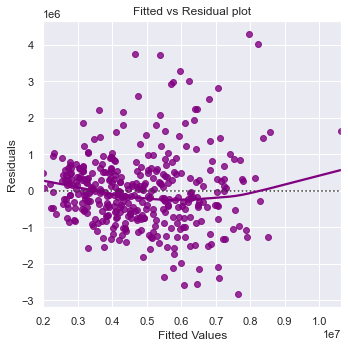

In [138]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

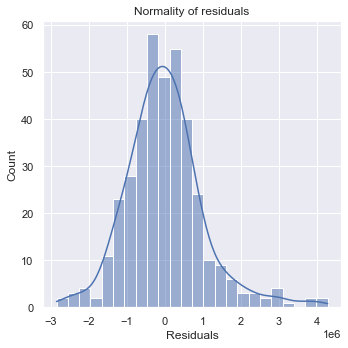

In [139]:
# TEST FOR NORMALITY

sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

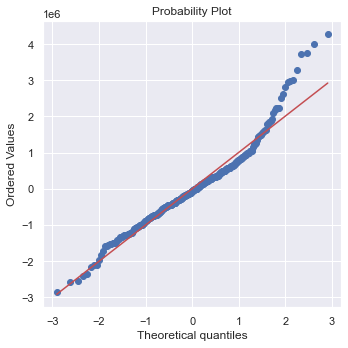

In [140]:
# Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [141]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9546526074409485, pvalue=1.932423332462463e-09)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
Strictly speaking, the residuals are not normal.

In [143]:
# TEST FOR HOMOSCEDASTICITY

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], xc_train2)
lzip(name, test)

[('F statistic', 1.0001819285024922), ('p-value', 0.4994582884112147)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied. H0: Data is homoscedastic

##### Remove outliers and refit| the model

In [155]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet # ML

In [156]:
x_train_final = xc_train2
x_test_final = xc_test2

In [157]:
def adj_r2_score(X, y, y_pred):
    r2 = r2_score(y, y_pred)
    n = X.shape[0]
    k = X.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [158]:
clf = LinearRegression()

clf.fit(x_train_final, y_train)
y_pred_train = clf.predict(x_train_final) 
y_pred_test = clf.predict(x_test_final)

print('R2 values:')
print(clf.score(x_train_final, y_train)) #.score means R2 square
print(clf.score(x_test_final, y_test))

print('\nAdjusted R2 values:')
print(adj_r2_score(x_train_final, y_train, y_pred_train))
print(adj_r2_score(x_test_final, y_test, y_pred_test))

R2 values:
0.6781996293933216
0.6581030493777055

Adjusted R2 values:
0.6695023220796276
0.6357568434546796


In [159]:
clf = Lasso()

clf.fit(x_train_final, y_train)

print('R2 values:')
print(clf.score(x_train_final, y_train)) 
print(clf.score(x_test_final, y_test))

print('\nAdjusted R2 values:')
print(adj_r2_score(x_train_final, y_train, y_pred_train))
print(adj_r2_score(x_test_final, y_test, y_pred_test))

R2 values:
0.6781996293786292
0.6581027186311237

Adjusted R2 values:
0.6695023220796276
0.6357568434546796


In [160]:
clf = Ridge()

clf.fit(x_train_final, y_train)

print('R2 values:')
print(clf.score(x_train_final, y_train)) 
print(clf.score(x_test_final, y_test))

print('\nAdjusted R2 values:')
print(adj_r2_score(x_train_final, y_train, y_pred_train))
print(adj_r2_score(x_test_final, y_test, y_pred_test))

R2 values:
0.6781500605873243
0.657585124282523

Adjusted R2 values:
0.6695023220796276
0.6357568434546796


In [161]:
clf = ElasticNet()

clf.fit(x_train_final, y_train)

print('R2 values:')
print(clf.score(x_train_final, y_train)) 
print(clf.score(x_test_final, y_test))

print('\nAdjusted R2 values:')
print(adj_r2_score(x_train_final, y_train, y_pred_train))
print(adj_r2_score(x_test_final, y_test, y_pred_test))

R2 values:
0.5710315157767762
0.5540401545264126

Adjusted R2 values:
0.6695023220796276
0.6357568434546796


#### If the accuracy is not high enough (> 0.8) wven after removal of outliers, we will use other non-linear regressors like KNN, RF, DT, SVM, GBM

In [ ]:
## other ML

In [167]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [168]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [169]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [175]:
X_train = xc_train
X_test = xc_test

In [176]:
### Decision Tree Model

In [177]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [178]:
dtree_model_train_perf=model_performance_regression(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
           RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  4818.081647  349.081365   0.999993        0.999993  0.010404


In [179]:
dtree_model_test_perf=model_performance_regression(dtree, X_test,y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared       MAPE
0  1.450841e+06  1.047926e+06   0.482871        0.434282  23.417316


In [ ]:
## Hyperparameter Tuning

In [181]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(7,20)) + [None], # 0.5 of the cols to 0.8 cols
              'min_samples_leaf': [1, 3, 5, 7, 10],  # no of leaves between 8 and 32
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5) # cv = 4/5
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_ # best_params_, best_score_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_impurity_decrease=0.001,
                      min_samples_leaf=7, random_state=1)

In [182]:
dtree_tuned_model_train_perf = model_performance_regression(dtree_tuned, X_train,y_train)
print("Training performance \n",dtree_tuned_model_train_perf)

Training performance 
             RMSE           MAE  R-squared  Adj. R-squared       MAPE
0  988470.663584  709579.43387   0.698709        0.687184  15.348068


In [183]:
dtree_tuned_model_test_perf = model_performance_regression(dtree_tuned, X_test,y_test)
print("Testing performance \n",dtree_tuned_model_test_perf)

Testing performance 
            RMSE            MAE  R-squared  Adj. R-squared       MAPE
0  1.356090e+06  989723.460567    0.54821         0.50576  21.916248


In [191]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
area                             0.538955
bathrooms                        0.227132
parking                          0.069497
prefarea_yes                     0.039704
furnishingstatus_unfurnished     0.035479
airconditioning_yes              0.030077
basement_yes                     0.029381
stories                          0.011617
mainroad_yes                     0.006307
bedrooms                         0.006074
furnishingstatus_semi-furnished  0.005779
const                            0.000000
guestroom_yes                    0.000000
hotwaterheating_yes              0.000000


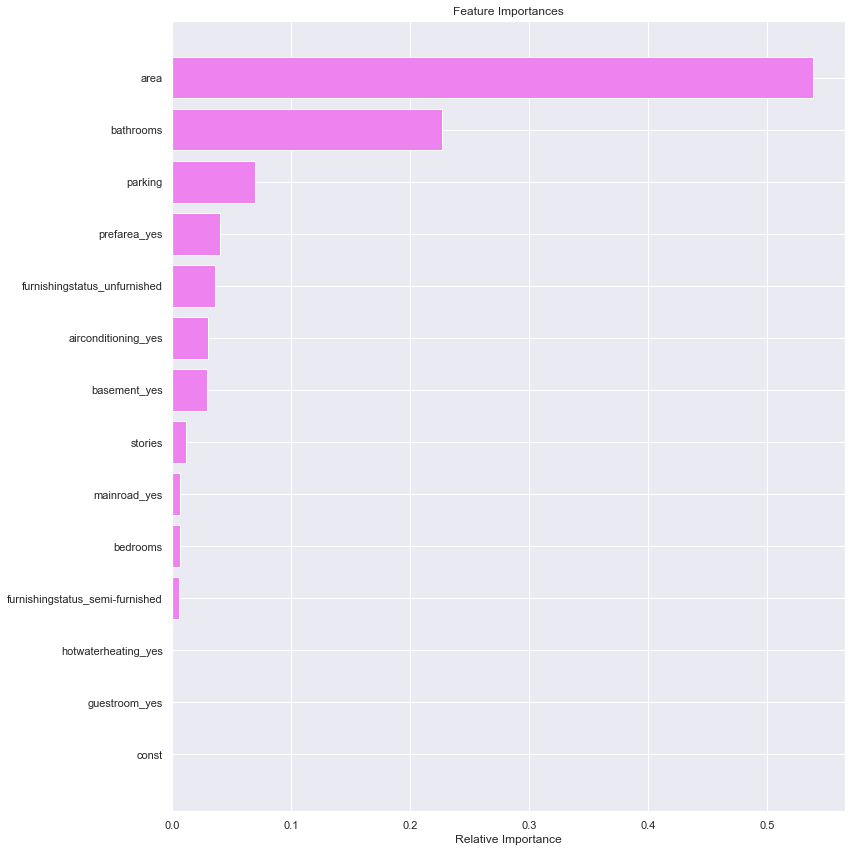

In [192]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
## Random Forest Model

In [184]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [185]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
             RMSE            MAE  R-squared  Adj. R-squared      MAPE
0  436450.690367  303337.300612   0.941261        0.939014  6.688229


In [186]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
            RMSE            MAE  R-squared  Adj. R-squared       MAPE
0  1.140071e+06  863535.906504   0.680682        0.650679  19.525754


In [ ]:
# # Choose the type of classifier. 
# rf_tuned = RandomForestRegressor(random_state=1)

# # Grid of parameters to choose from
# parameters = {  
#                 'max_depth':[4, 6, 8, 10, None],
#                 'max_features': ['sqrt','log2',None],
#                 'n_estimators': [80, 90, 100, 110, 120]
# }

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.r2_score)

# # Run the grid search
# grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# rf_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data. 
# rf_tuned.fit(X_train, y_train)

In [ ]:
# rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
# print("Training performance \n",rf_tuned_model_train_perf)

In [ ]:
# rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
# print("Testing performance \n",rf_tuned_model_test_perf)

In [ ]:
## run above change rf_estimator to rf_tuned below

In [201]:
print(pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
area                             0.443317
bathrooms                        0.182265
parking                          0.066856
stories                          0.063988
basement_yes                     0.045288
airconditioning_yes              0.035694
bedrooms                         0.031841
prefarea_yes                     0.028706
furnishingstatus_unfurnished     0.028468
hotwaterheating_yes              0.020996
guestroom_yes                    0.020796
furnishingstatus_semi-furnished  0.019326
mainroad_yes                     0.012459
const                            0.000000


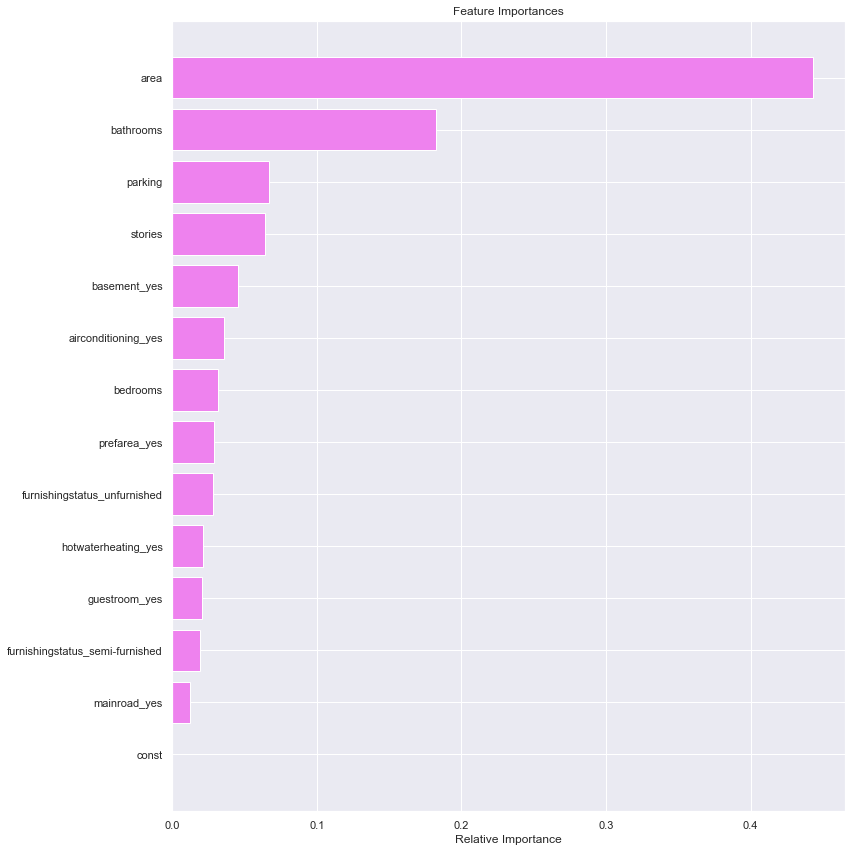

In [202]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
### AdaBoost Regressor

In [194]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [195]:
ab_regressor_model_train_perf = model_performance_regression(ab_regressor, X_train,y_train)
print("Training performance \n",ab_regressor_model_train_perf)

Training performance 
            RMSE            MAE  R-squared  Adj. R-squared       MAPE
0  1.052264e+06  844110.204662   0.658565        0.645504  20.276659


In [196]:
ab_regressor_model_test_perf = model_performance_regression(ab_regressor, X_test,y_test)
print("Testing performance \n",ab_regressor_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared       MAPE
0  1.401281e+06  1.050774e+06   0.517598        0.472271  25.305929


In [ ]:
### Hyperparameter Tuning

In [197]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,300,50), # 50, 70, 100, 200, 300 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=250, random_state=1)

In [198]:
ab_tuned_model_train_perf = model_performance_regression(ab_tuned, X_train,y_train)
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
            RMSE            MAE  R-squared  Adj. R-squared       MAPE
0  1.013423e+06  808186.128889   0.683305        0.671191  19.360951


In [199]:
ab_tuned_model_test_perf = model_performance_regression(ab_tuned, X_test,y_test)
print("Testing performance \n",ab_tuned_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared       MAPE
0  1.351063e+06  1.021200e+06   0.551554        0.509418  24.753983


In [203]:
print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
area                             0.347515
bathrooms                        0.211981
parking                          0.141860
prefarea_yes                     0.067783
basement_yes                     0.059349
stories                          0.035355
guestroom_yes                    0.027987
bedrooms                         0.027189
furnishingstatus_unfurnished     0.024489
airconditioning_yes              0.019800
hotwaterheating_yes              0.018617
mainroad_yes                     0.013819
furnishingstatus_semi-furnished  0.004257
const                            0.000000


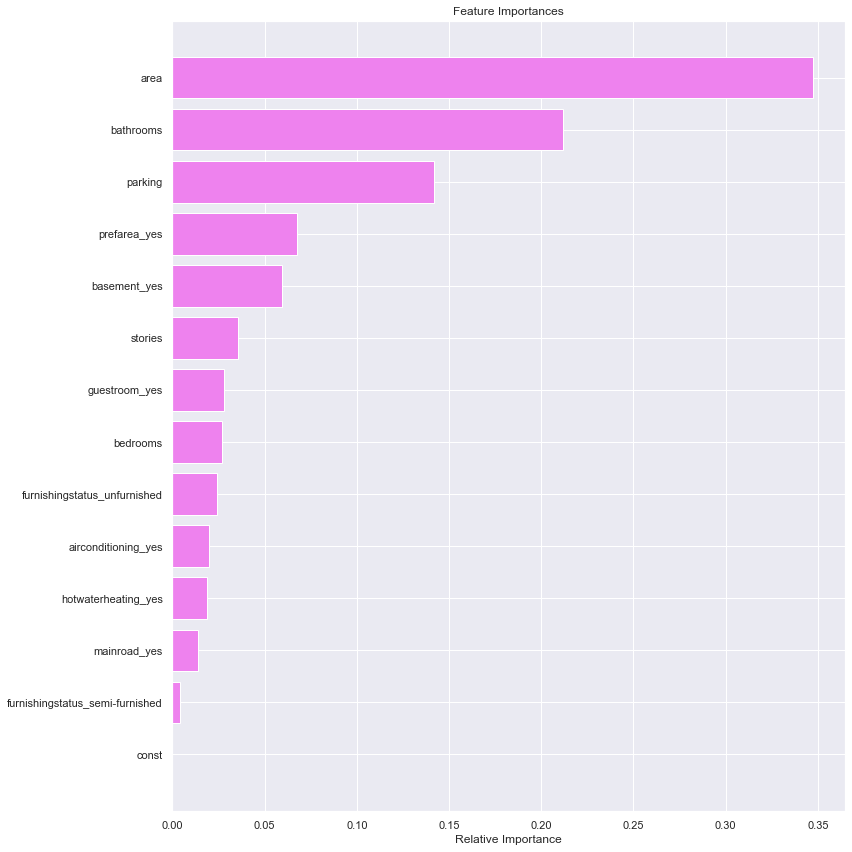

In [204]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
### Gradient Boosting Regressor

In [211]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [212]:
gb_estimator_model_train_perf = model_performance_regression(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

Training performance 
             RMSE            MAE  R-squared  Adj. R-squared       MAPE
0  661195.949433  498260.224312   0.865191        0.860034  11.283687


In [213]:
gb_estimator_model_test_perf = model_performance_regression(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

Testing performance 
            RMSE            MAE  R-squared  Adj. R-squared       MAPE
0  1.171703e+06  846123.760691   0.662717        0.631027  19.343583


In [214]:
### Hyperparameter Tuning

In [215]:
# # Choose the type of classifier. 
# gb_tuned = GradientBoostingRegressor(random_state=1)

# # Grid of parameters to choose from
# parameters = {'n_estimators': np.arange(50,200,25), 
#               'subsample':[0.7,0.8,0.9,1], 
#               'max_features':[0.7,0.8,0.9,1],
#               'max_depth':[3,5,7,10]  # (50 TO 80% of the columns)
#               }

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.r2_score)

# # Run the grid search
# grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# gb_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data. 
# gb_tuned.fit(X_train, y_train)

In [216]:
# gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train,y_train)
# print("Training performance \n",gb_tuned_model_train_perf)

In [217]:
# gb_tuned_model_test_perf = model_performance_regression(gb_tuned, X_test, y_test)
# print("Testing performance \n",gb_tuned_model_test_perf)

In [218]:
## run above change gb_estimator to gb_tuned below

In [219]:
print(pd.DataFrame(gb_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
area                             0.445775
bathrooms                        0.178938
parking                          0.075321
stories                          0.073636
basement_yes                     0.047948
airconditioning_yes              0.045709
mainroad_yes                     0.023960
bedrooms                         0.023754
furnishingstatus_unfurnished     0.023298
guestroom_yes                    0.021029
prefarea_yes                     0.019425
hotwaterheating_yes              0.015634
furnishingstatus_semi-furnished  0.005573
const                            0.000000


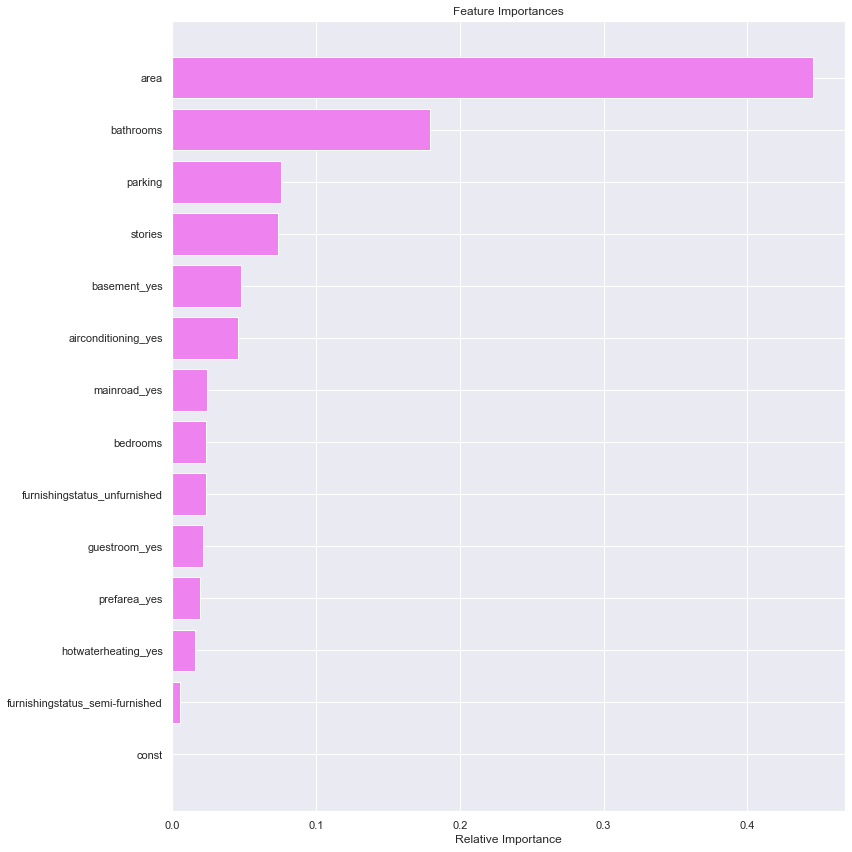

In [220]:
feature_names = X_train.columns
importances = gb_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [221]:
### XGBoost Regressor

In [222]:
xgb_estimator=XGBRegressor(random_state=1, verbosity = 0)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [223]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
            RMSE           MAE  R-squared  Adj. R-squared      MAPE
0  65342.316551  41220.791339   0.998683        0.998633  1.047376


In [224]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

Testing performance 
            RMSE            MAE  R-squared  Adj. R-squared       MAPE
0  1.291000e+06  929032.958079    0.59054        0.552067  21.544891


In [225]:
### Hyperparameter Tuning

In [227]:
# # Choose the type of classifier. 
# xgb_tuned = XGBRegressor(random_state=1, verbosity = 0)

# # Grid of parameters to choose from
# parameters = {'n_estimators': [75,100,125,150], 
#               'subsample':[0.7, 0.8, 0.9, 1],
#               'gamma':[0, 1, 3, 5],
#               'colsample_bytree':[0.7, 0.8, 0.9, 1],
#               'colsample_bylevel':[0.7, 0.8, 0.9, 1]
#               }

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.r2_score)

# # Run the grid search
# grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# xgb_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data. 
# xgb_tuned.fit(X_train, y_train)

In [228]:
# xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
# print("Training performance \n",xgb_tuned_model_train_perf)

In [229]:
# xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
# print("Testing performance \n",xgb_tuned_model_test_perf)

In [ ]:
## run above change xgb_estimator to xgb_tuned below

In [230]:
print(pd.DataFrame(xgb_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
bathrooms                        0.236035
airconditioning_yes              0.100892
mainroad_yes                     0.095717
basement_yes                     0.091508
stories                          0.082697
hotwaterheating_yes              0.079382
area                             0.069851
parking                          0.061802
guestroom_yes                    0.060129
furnishingstatus_unfurnished     0.041950
prefarea_yes                     0.035121
bedrooms                         0.024478
furnishingstatus_semi-furnished  0.020438
const                            0.000000


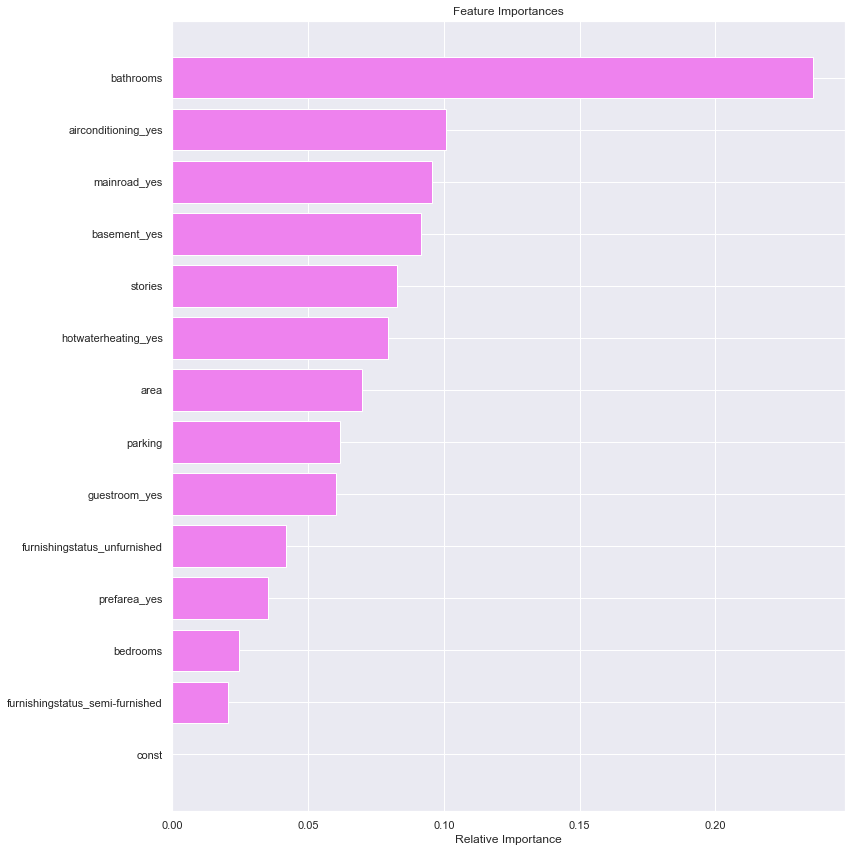

In [231]:
feature_names = X_train.columns
importances = xgb_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [232]:
## Stacking Model

In [234]:
estimators=[('Decision Tree', dtree_tuned), ('Random Forest', rf_estimator), ('Gradient Boosting', gb_estimator)]

final_estimator=xgb_estimator #meta learner 

In [235]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=8,
                                                     min_impurity_decrease=0.001,
                                                     min_samples_leaf=7,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                               colsample_bylevel=1,
                                               c...
                                               colsample_bytree=1, gamma=0,
                                               gpu_id=-1,
                                               importance_type='gain',
                                               interaction_constraints='',
                                               learning_rate=0.300000012,
                                               max_delta_step=0, max_depth=6,
                                               min_child_weight=1, missing=nan,
                                               monotone_constraints='()',
                                               n_estimators=100, n_jobs=8,
                                               num_parallel_tree=1,
                                               random_state=1, reg_alpha=0,
                                               reg_lambda=1, scale_pos_weight=1,
                                               subsample=1, tree_method='exact',
                                               validate_parameters=1,
                                               verbosity=0))

In [236]:
stacking_estimator_model_train_perf = model_performance_regression(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
            RMSE            MAE  R-squared  Adj. R-squared       MAPE
0  1.189157e+06  775587.639764   0.563949        0.547269  16.220456


In [237]:
stacking_estimator_model_test_perf = model_performance_regression(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared       MAPE
0  1.363613e+06  1.011281e+06   0.543184        0.500262  22.355392


In [ ]:
## after tuning uncomment below

In [242]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,
     dtree_tuned_model_train_perf.T,
     rf_estimator_model_train_perf.T,
#      rf_tuned_model_train_perf.T,
    ab_regressor_model_train_perf.T,
     ab_tuned_model_train_perf.T,
     gb_estimator_model_train_perf.T,
#      gb_tuned_model_train_perf.T,
    xgb_estimator_model_train_perf.T,
#      xgb_tuned_model_train_perf.T,
     stacking_estimator_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
#     "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
#     "Gradient Boost Tuned",
    "XGB",
#     "XGB Tuned",
    "Stacking Classifier"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,XGB,Stacking Classifier
RMSE,4818.081647,988470.663584,436450.690367,1.052264e+06,1.013423e+06,661195.949433,65342.316551,1.189157e+06
MAE,349.081365,709579.433870,303337.300612,8.441102e+05,8.081861e+05,498260.224312,41220.791339,7.755876e+05
R-squared,0.999993,0.698709,0.941261,6.585646e-01,6.833051e-01,0.865191,0.998683,5.639488e-01
Adj. R-squared,0.999993,0.687184,0.939014,6.455042e-01,6.711911e-01,0.860034,0.998633,5.472693e-01
MAPE,0.010404,15.348068,6.688229,2.027666e+01,1.936095e+01,11.283687,1.047376,1.622046e+01


In [244]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,
     dtree_tuned_model_test_perf.T,
     rf_estimator_model_test_perf.T,
#      rf_tuned_model_test_perf.T,
    ab_regressor_model_test_perf.T,
     ab_tuned_model_test_perf.T,
     gb_estimator_model_test_perf.T,
#      gb_tuned_model_test_perf.T,
    xgb_estimator_model_test_perf.T,
#      xgb_tuned_model_test_perf.T,
     stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
#     "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
#     "Gradient Boost Tuned",
    "XGB",
#     "XGB Tuned",
    "Stacking Classifier"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,XGB,Stacking Classifier
RMSE,1.450841e+06,1.356090e+06,1.140071e+06,1.401281e+06,1.351063e+06,1.171703e+06,1.291000e+06,1.363613e+06
MAE,1.047926e+06,9.897235e+05,8.635359e+05,1.050774e+06,1.021200e+06,8.461238e+05,9.290330e+05,1.011281e+06
R-squared,4.828714e-01,5.482105e-01,6.806823e-01,5.175979e-01,5.515540e-01,6.627175e-01,5.905396e-01,5.431842e-01
Adj. R-squared,4.342822e-01,5.057605e-01,6.506793e-01,4.722715e-01,5.094181e-01,6.310265e-01,5.520668e-01,5.002619e-01
MAPE,2.341732e+01,2.191625e+01,1.952575e+01,2.530593e+01,2.475398e+01,1.934358e+01,2.154489e+01,2.235539e+01


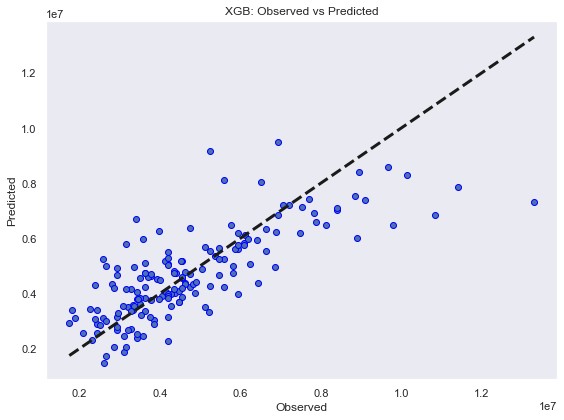

In [245]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=xgb_estimator.predict(X_test) 
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("XGB: Observed vs Predicted")
plt.grid()
plt.show()

In [ ]:
## change estimator to tuned ones

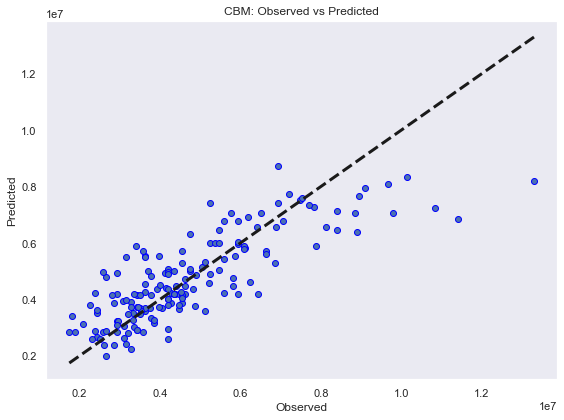

In [248]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_estimator.predict(X_test) # 
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("CBM: Observed vs Predicted")
plt.grid()
plt.show()

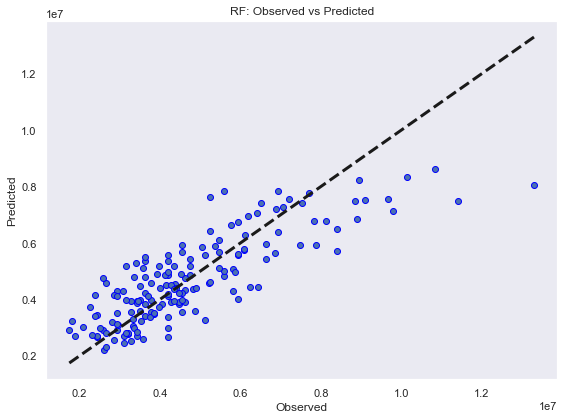

In [249]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=rf_estimator.predict(X_test) # xgb_estimator
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("RF: Observed vs Predicted")
plt.grid()
plt.show()